# Notebook 4: Exploratory Data Analysis and Modeling

## Introduction

This notebook is intended as a reference for this blog post: https://www.angelineprotacio.com/portfolio/quality-starts/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV

In [2]:
df = pd.read_csv('../data/training_data_model.csv')
df_subset = df[['QS_2016', 'FIP_proj_2017', 'QS_2017']].dropna()

## Exploratory Data Analysis

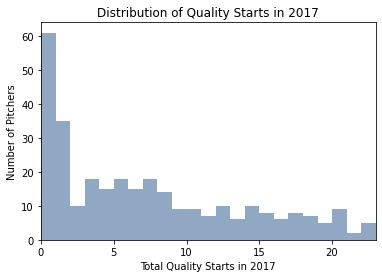

In [3]:
plt.hist(df['QS_2017'], bins = 23, color="#91a8c4")
plt.xlim(0, 23)
plt.xticks(np.arange(0, 23, 5))
plt.title('Distribution of Quality Starts in 2017')
plt.ylabel('Number of Pitchers')
plt.xlabel('Total Quality Starts in 2017');

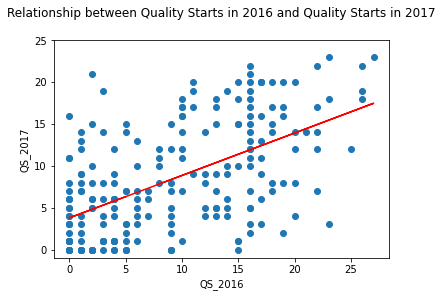

In [4]:
plt.scatter(df_subset['QS_2016'], df_subset['QS_2017'])
plt.xlabel("QS_2016")
plt.ylabel("QS_2017")
plt.title("Relationship between Quality Starts in 2016 and Quality Starts in 2017", y = 1.08)
m, b = np.polyfit(df_subset['QS_2016'], df_subset['QS_2017'], 1)
plt.plot(df_subset['QS_2016'], m*df_subset['QS_2016'] + b, color = 'red')
plt.ylim(-1, 25);

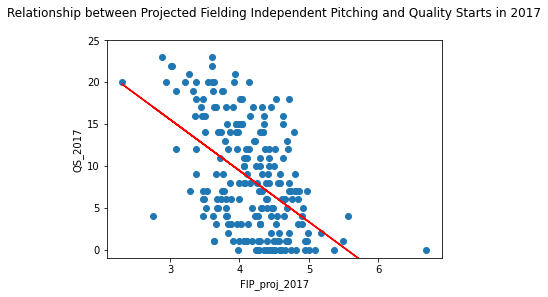

In [5]:
plt.scatter(df_subset['FIP_proj_2017'], df_subset['QS_2017'])
plt.xlabel("FIP_proj_2017")
plt.ylabel("QS_2017")
plt.title("Relationship between Projected Fielding Independent Pitching and Quality Starts in 2017", y = 1.08)
m, b = np.polyfit(df_subset['FIP_proj_2017'], df_subset['QS_2017'], 1)
plt.plot(df_subset['FIP_proj_2017'], m*df_subset['FIP_proj_2017'] + b, color = 'red')
plt.ylim(-1, 25);

## Modeling

### Training the Model on Projection + Season Metrics

In [6]:
varlist3 = ['QS_2017', 'IP_2016', 'GS_2016', 'Wgs_2016', 'Wtm_2016',  'QS_2016', 'GmScA_2016', 'Best_2016', 
                 'lDR_2016', 'IP/GS_2016', 'Pit/GS_2016', '100-119_2016', 'Max_2016', 
                 'IP_proj_2017', 'K_proj_2017', 'ERA_proj_2017', 'FIP_proj_2017', 'zWAR_proj_2017']

In [7]:
df_nona = df.loc[:,varlist3].dropna()

In [8]:
df_nona.describe().T

,count,mean,std,min,25%,50%,75%,max
QS_2017,214.0,8.364486,6.663463,0.00,3.0000,7.000,14.0000,23.00
IP_2016,214.0,114.111215,65.944716,4.00,53.9250,120.000,174.9250,230.00
GS_2016,214.0,18.859813,11.100014,1.00,8.0000,20.000,30.0000,35.00
Wgs_2016,214.0,6.649533,5.355316,0.00,2.0000,6.000,10.0000,22.00
Wtm_2016,214.0,9.593458,6.791195,0.00,3.0000,9.000,15.0000,25.00
QS_2016,214.0,9.210280,7.373196,0.00,2.0000,9.000,16.0000,27.00
GmScA_2016,214.0,49.378972,7.526621,24.00,45.3250,49.850,54.0000,70.30
Best_2016,214.0,73.196262,13.219305,24.00,67.0000,75.000,81.0000,98.00
lDR_2016,214.0,9.504673,5.316064,0.00,5.0000,10.000,14.0000,21.00
IP/GS_2016,214.0,5.428505,0.746435,3.00,5.0000,5.500,5.9000,7.10


I wanted to try two models, one with first degree features, and another with polynomial features to see if it would improve performance. 

In [9]:
x_train = df_nona.iloc[:, 1:]
y_train = df_nona.iloc[:, :1]

In [10]:
m1 = LinearRegression()
m1.fit(x_train,y_train)
m1.score(x_train,y_train)

0.4449424352353504

In [11]:
m1.coef_

array([[ 0.00692879,  0.18125467,  0.07276861, -0.41353319,  0.22682141,
         0.22357879, -0.07305459, -0.02204661, -0.20020814, -0.15776399,
         0.15329583,  0.11028093, -0.01856348, -0.02579546,  3.50921283,
        -4.24720002,  2.27188748]])

In [12]:
mp1 = LinearRegression()
p = PolynomialFeatures(degree = 2)
x_train_poly = p.fit_transform(x_train)
mp1.fit(x_train_poly, y_train)
mp1.score(x_train_poly, y_train)

0.8080557935650412

The model with polynomial features has a higher R^2, but there isn't a good reason to believe there is a polynomial relationship between quality starts and any of my features. 

### Bring in Validation Set

In [13]:
validation = pd.read_csv('../data/validation_data_model.csv')

In [14]:
varlist_val = ['QS_2018', 'IP_2017', 'GS_2017', 'Wgs_2017', 'Wtm_2017',  'QS_2017', 'GmScA_2017', 'Best_2017', 
                 'lDR_2017', 'IP/GS_2017', 'Pit/GS_2017', '100-119_2017', 'Max_2017', 
                 'IP_2018', 'K_2018', 'ERA_2018', 'FIP_2018', 'zWAR_2018']
validation_simple = validation.loc[:,varlist_val]

In [15]:
validation_simple = validation_simple.dropna()

In [16]:
validation_simple.describe().T

,count,mean,std,min,25%,50%,75%,max
QS_2018,208.0,8.033654,7.148110,0.00,1.0000,7.000,13.0000,28.00
IP_2017,208.0,110.523077,61.420176,6.00,52.9000,120.100,162.0250,214.10
GS_2017,208.0,18.793269,10.629944,1.00,8.7500,20.000,28.2500,34.00
Wgs_2017,208.0,6.697115,5.134857,0.00,2.0000,6.000,11.0000,18.00
Wtm_2017,208.0,9.634615,6.308583,0.00,4.0000,9.000,15.0000,24.00
QS_2017,208.0,8.750000,6.734797,0.00,3.0000,8.000,14.0000,23.00
GmScA_2017,208.0,49.106250,6.804510,18.00,46.4000,49.600,53.0000,67.80
Best_2017,208.0,72.365385,12.176685,18.00,68.0000,75.000,80.0000,95.00
lDR_2017,208.0,9.783654,5.563539,0.00,5.0000,11.000,15.0000,22.00
IP/GS_2017,208.0,5.328846,0.784287,2.00,5.0000,5.450,5.8250,7.00


In [17]:
#split feature list into predictors and target
x_val = validation_simple.iloc[:,1:]
y_val = validation_simple.loc[:,['QS_2018']]

In [18]:
m1.score(x_val,y_val)

0.3530370475302914

In [19]:
x_val_poly = p.transform(x_val)

In [20]:
mp1.score(x_val_poly, y_val)

-4.891614959291566

As expected, the model with polynomial features overfit, whereas the model with first order features only did slightly worse on the validation set than on the training set. Still, the R^2 leaves much to be desired.

### Use Lasso 

I opted to try feature selection using Lasso, on both models.

In [21]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [22]:
m2 = LassoCV()
m2.fit(x_train_poly, y_train)
m2.score(x_train_poly, y_train)

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.3513108198489955

In [23]:
x_val_poly = p.fit_transform(x_val)
m2.score(x_val_poly, y_val)

0.3485281374503203

### Lasso on First Degree Features

In [24]:
m3 = LassoCV()
m3.fit(x_train, y_train)
m3.score(x_train, y_train)

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.42769394140162587

In [25]:
m3.score(x_val, y_val)

0.3730948064204077

In [26]:
m3.coef_

array([ 0.01486432,  0.07860893, -0.        , -0.29179845,  0.26462369,
        0.16444828, -0.04578432,  0.        ,  0.        , -0.13390376,
        0.13298757,  0.07541632, -0.02579768,  0.00595405, -0.        ,
       -0.10649486,  1.50897644])

The following features were zeroed out by Lasso: Wgs_2017, lDR_2017, IP/GS_2017, ERA_2018. This means they do not make a substantial contribution to predicting quality starts.

### Training the Model on Projection Features Only


I opted to try just the projection features alone, since that would improve interpretation of the model. Given that the R^2 is so low, if removing the season features doesn't make a huge difference, at least the model will be more interpretable. I go through the same process as above, but now just with the projection features.

In [27]:
proj_varlist = ['QS_2017', 'Age_proj_2017', 'G_proj_2017', 'GS_proj_2017', 'IP_proj_2017', 'K_proj_2017', 
                'BB_proj_2017', 'HR_proj_2017', 'H_proj_2017', 'ER_proj_2017', 'TBF_proj_2017', 'BABIP_proj_2017', 
                'ERA_proj_2017', 'FIP_proj_2017', 'K/9_proj_2017', 'BB/9_proj_2017', 
                'HR/9_proj_2017', 'ERA+_proj_2017']
df_proj = df.loc[:, proj_varlist]

In [28]:
x_train = df_proj.iloc[:, 1:]
y_train = df_proj.iloc[:, :1]

In [29]:
m1 = LinearRegression()
m1.fit(x_train,y_train)
m1.score(x_train,y_train)

0.4126730319525699

### Bring in validation set

In [30]:
df_proj.columns

Index(['QS_2017', 'Age_proj_2017', 'G_proj_2017', 'GS_proj_2017',
       'IP_proj_2017', 'K_proj_2017', 'BB_proj_2017', 'HR_proj_2017',
       'H_proj_2017', 'ER_proj_2017', 'TBF_proj_2017', 'BABIP_proj_2017',
       'ERA_proj_2017', 'FIP_proj_2017', 'K/9_proj_2017', 'BB/9_proj_2017',
       'HR/9_proj_2017', 'ERA+_proj_2017'],
      dtype='object')

In [31]:
proj_vallist = ['QS_2018', 'Age_2018', 'G_2018', 'GS_2018', 'IP_2018', 'K_2018', 'BB_2018', 'HR_2018', 'H_2018', 
                'ER_2018', 'TBF_2018', 'BABIP_2018', 'ERA_2018', 'FIP_2018', 'K/9_2018', 'BB/9_2018', 
                'HR/9_2018', 'ERA+_2018']
val_proj = validation.loc[:, proj_vallist]

In [32]:
val_proj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QS_2018     330 non-null    int64  
 1   Age_2018    330 non-null    int64  
 2   G_2018      330 non-null    int64  
 3   GS_2018     330 non-null    int64  
 4   IP_2018     330 non-null    float64
 5   K_2018      330 non-null    int64  
 6   BB_2018     330 non-null    int64  
 7   HR_2018     330 non-null    int64  
 8   H_2018      330 non-null    int64  
 9   ER_2018     330 non-null    int64  
 10  TBF_2018    330 non-null    int64  
 11  BABIP_2018  330 non-null    float64
 12  ERA_2018    330 non-null    float64
 13  FIP_2018    330 non-null    float64
 14  K/9_2018    330 non-null    float64
 15  BB/9_2018   330 non-null    float64
 16  HR/9_2018   330 non-null    float64
 17  ERA+_2018   330 non-null    int64  
dtypes: float64(7), int64(11)
memory usage: 46.5 KB


In [33]:
x_val = val_proj.iloc[:, 1:]
y_val = val_proj.iloc[:, :1]

In [34]:
m1.score(x_val,y_val)

0.36224662605542335

### Using LassoCV for First Degree Features

In [35]:
m2 = LassoCV()
m2.fit(x_train, y_train)
m2.score(x_train, y_train)

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.3982877149735315

In [36]:
m2.score(x_val, y_val)

0.3940769290921342

In [37]:
list(zip(x_val.columns, m2.coef_))

[('Age_2018', 0.23620895390902794),
 ('G_2018', -0.020710901932448438),
 ('GS_2018', 0.0767489933690011),
 ('IP_2018', 0.031170276188914547),
 ('K_2018', 0.030725744472932477),
 ('BB_2018', -0.014981260355807756),
 ('HR_2018', -0.22093998412691346),
 ('H_2018', -0.0),
 ('ER_2018', -0.0),
 ('TBF_2018', 0.0035736543918465833),
 ('BABIP_2018', -0.0),
 ('ERA_2018', 0.0),
 ('FIP_2018', -0.0),
 ('K/9_2018', -0.0),
 ('BB/9_2018', -0.0),
 ('HR/9_2018', -0.0),
 ('ERA+_2018', 0.11670787276830409)]

### Polynomial Features

In [38]:
mp1 = LinearRegression()
p = PolynomialFeatures(degree = 2)
x_train_poly = p.fit_transform(x_train)
mp1.fit(x_train_poly, y_train)
mp1.score(x_train_poly, y_train)

0.5360348804544325

In [39]:
x_val_poly = p.transform(x_val)
mp1.score(x_val_poly, y_val)

-10.460689075443133

### Using LassoCV for Polynomial Features


In [40]:
mp2 = LassoCV()
mp2.fit(x_train_poly, y_train)
mp2.score(x_train_poly, y_train)

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.3885647733330536

In [41]:
mp2.score(x_val_poly, y_val)

0.3914709496912312

In [42]:
list(zip(['Age_proj_2017', 'G_proj_2017', 'GS_proj_2017', 'IP_proj_2017', 'K_proj_2017', 
                              'BB_proj_2017', 'HR_proj_2017', 'H_proj_2017', 'ER_proj_2017', 'TBF_proj_2017',
                              'BABIP_proj_2017', 'ERA_proj_2017', 'FIP_proj_2017', 'K/9_proj_2017', 'BB/9_proj_2017', 
                              'HR/9_proj_2017', 'ERA+_proj_2017'], m2.coef_))

[('Age_proj_2017', 0.23620895390902794),
 ('G_proj_2017', -0.020710901932448438),
 ('GS_proj_2017', 0.0767489933690011),
 ('IP_proj_2017', 0.031170276188914547),
 ('K_proj_2017', 0.030725744472932477),
 ('BB_proj_2017', -0.014981260355807756),
 ('HR_proj_2017', -0.22093998412691346),
 ('H_proj_2017', -0.0),
 ('ER_proj_2017', -0.0),
 ('TBF_proj_2017', 0.0035736543918465833),
 ('BABIP_proj_2017', -0.0),
 ('ERA_proj_2017', 0.0),
 ('FIP_proj_2017', -0.0),
 ('K/9_proj_2017', -0.0),
 ('BB/9_proj_2017', -0.0),
 ('HR/9_proj_2017', -0.0),
 ('ERA+_proj_2017', 0.11670787276830409)]

Now I will try using both models on the test set. 

### Bring in Test Set

In [43]:
test = pd.read_csv('../data/test_data_model.csv')

In [44]:
proj_testlist = ['QS_2019', 'Age_2019', 'G_2019', 'GS_2019', 'IP_2019', 'SO_2019', 
                 'BB_2019', 'HR_2019', 'H_2019', 'ER_2019', 'TBF_2019', 
                 'BABIP_2019', 'ERA_2019', 'FIP_2019', 'K/9_2019', 'BB/9_2019', 'HR/9_2019', 'ERA+_2019']
test_proj = test.loc[:, proj_testlist]

In [45]:
test_proj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QS_2019     359 non-null    int64  
 1   Age_2019    359 non-null    int64  
 2   G_2019      359 non-null    int64  
 3   GS_2019     359 non-null    int64  
 4   IP_2019     359 non-null    float64
 5   SO_2019     359 non-null    int64  
 6   BB_2019     359 non-null    int64  
 7   HR_2019     359 non-null    int64  
 8   H_2019      359 non-null    int64  
 9   ER_2019     359 non-null    int64  
 10  TBF_2019    359 non-null    int64  
 11  BABIP_2019  359 non-null    float64
 12  ERA_2019    359 non-null    float64
 13  FIP_2019    359 non-null    float64
 14  K/9_2019    359 non-null    float64
 15  BB/9_2019   359 non-null    float64
 16  HR/9_2019   359 non-null    float64
 17  ERA+_2019   359 non-null    int64  
dtypes: float64(7), int64(11)
memory usage: 50.6 KB


In [46]:
x_test = test_proj.iloc[:, 1:]
y_test = test_proj.iloc[:, :1]

This is the result for the model that doesn't use Lasso.

In [47]:
m1.score(x_test,y_test)

-0.20180919576918033

This is the result for the model that does use Lasso.

In [48]:
m2.score(x_test, y_test)

0.3176841907516854

In [49]:
list(zip(x_test.columns, m2.coef_))

[('Age_2019', 0.23620895390902794),
 ('G_2019', -0.020710901932448438),
 ('GS_2019', 0.0767489933690011),
 ('IP_2019', 0.031170276188914547),
 ('SO_2019', 0.030725744472932477),
 ('BB_2019', -0.014981260355807756),
 ('HR_2019', -0.22093998412691346),
 ('H_2019', -0.0),
 ('ER_2019', -0.0),
 ('TBF_2019', 0.0035736543918465833),
 ('BABIP_2019', -0.0),
 ('ERA_2019', 0.0),
 ('FIP_2019', -0.0),
 ('K/9_2019', -0.0),
 ('BB/9_2019', -0.0),
 ('HR/9_2019', -0.0),
 ('ERA+_2019', 0.11670787276830409)]

In [50]:
x_test_poly = p.transform(x_test)

In [51]:
mp1.score(x_test_poly, y_test)

-62807.40948240944

In [52]:
mp2.score(x_test_poly, y_test)

0.32919861285233976

The model with first order features from just the projection data is simpler, more interpretable, and performs just as well as the model with polynomial features, so I will go with the model using first order features.

## Create final datasets including model predictions

### Training dataset

In [53]:
df_proj_predict = df.loc[:, ['Full_Name', 'ID', 'QS_2017', 'Age_proj_2017', 'G_proj_2017', 'GS_proj_2017', 'IP_proj_2017', 'K_proj_2017', 
                'BB_proj_2017', 'HR_proj_2017', 'H_proj_2017', 'ER_proj_2017', 'TBF_proj_2017', 'BABIP_proj_2017', 
                'ERA_proj_2017', 'FIP_proj_2017', 'K/9_proj_2017', 'BB/9_proj_2017', 
                'HR/9_proj_2017', 'ERA+_proj_2017']]

In [54]:
df_proj_predict['m2_y'] = m2.predict(x_train)
df_proj_predict['m2_res'] = df_proj_predict['QS_2017']-df_proj_predict['m2_y']

In [55]:
df_proj_predict['mp2_y'] = mp2.predict(x_train_poly)
df_proj_predict['mp2_res'] = df_proj_predict['QS_2017']-df_proj_predict['mp2_y']

In [56]:
df_proj_predict.head()

,Full_Name,ID,QS_2017,Age_proj_2017,G_proj_2017,GS_proj_2017,IP_proj_2017,K_proj_2017,BB_proj_2017,HR_proj_2017,...,ERA_proj_2017,FIP_proj_2017,K/9_proj_2017,BB/9_proj_2017,HR/9_proj_2017,ERA+_proj_2017,m2_y,m2_res,mp2_y,mp2_res
0,Tim Adleman,adlemti01,7,29,27,19,111.7,82,37,18,...,4.76,4.97,6.61,2.98,1.45,84,4.004837,2.995163,4.530475,2.469525
1,Raul Alcantara,alcanra01,0,24,25,25,114.7,69,29,19,...,5.10,5.00,5.42,2.28,1.49,78,2.275626,-2.275626,2.951539,-2.951539
2,Chase Anderson,anderch01,13,29,27,27,139.7,113,46,22,...,4.64,4.69,7.28,2.96,1.42,88,6.335468,6.664532,6.100884,6.899116
3,Tyler Anderson,anderty01,5,27,22,22,113.7,89,39,15,...,4.28,4.47,7.05,3.09,1.19,110,7.860935,-2.860935,7.927696,-2.927696
4,Matt Andriese,andrima01,6,27,36,22,143.0,126,30,16,...,3.71,3.49,7.93,1.89,1.01,106,9.414828,-3.414828,9.531932,-3.531932


### Validation dataset


In [57]:
val_proj_predict = validation.loc[:, ['Full_Name', 'ID', 'QS_2018', 'Age_2018', 'G_2018', 'GS_2018', 'IP_2018', 'K_2018', 'BB_2018', 'HR_2018', 'H_2018', 
                'ER_2018', 'TBF_2018', 'BABIP_2018', 'ERA_2018', 'FIP_2018', 'K/9_2018', 'BB/9_2018', 
                'HR/9_2018', 'ERA+_2018']]

In [58]:
val_proj_predict['m2_y'] = m2.predict(x_val)
val_proj_predict['m2_res'] = val_proj_predict['QS_2018']-val_proj_predict['m2_y']

In [59]:
val_proj_predict['mp2_y'] = mp2.predict(x_val_poly)
val_proj_predict['mp2_res'] = val_proj_predict['QS_2018']-val_proj_predict['mp2_y']

In [60]:
val_proj_predict.head()

,Full_Name,ID,QS_2018,Age_2018,G_2018,GS_2018,IP_2018,K_2018,BB_2018,HR_2018,...,ERA_2018,FIP_2018,K/9_2018,BB/9_2018,HR/9_2018,ERA+_2018,m2_y,m2_res,mp2_y,mp2_res
0,Brett Anderson,anderbr04,6,30,20,20,97.3,61,31,10,...,4.44,4.20,5.64,2.87,0.92,95,6.316896,-0.316896,5.714868,0.285132
1,Chase Anderson,anderch01,11,30,26,26,135.3,119,44,21,...,4.32,4.48,7.91,2.93,1.40,100,8.121327,2.878673,8.011445,2.988555
2,Tyler Anderson,anderty01,16,28,21,19,105.0,91,36,16,...,4.46,4.55,7.80,3.09,1.37,110,7.351788,8.648212,7.218508,8.781492
3,Matt Andriese,andrima01,0,28,26,22,121.0,109,27,18,...,4.09,4.01,8.11,2.01,1.34,100,7.245545,-7.245545,7.002734,-7.002734
4,Chris Archer,archech01,12,29,32,32,195.7,230,59,20,...,3.27,3.10,10.58,2.71,0.92,125,17.254020,-5.254020,17.452344,-5.452344


### Test dataset


In [61]:
test_proj_predict = test.loc[:, ['Full_Name', 'ID', 'QS_2019', 'Age_2019', 'G_2019', 'GS_2019', 'IP_2019', 'SO_2019', 
                 'BB_2019', 'HR_2019', 'H_2019', 'ER_2019', 'TBF_2019', 
                 'BABIP_2019', 'ERA_2019', 'FIP_2019', 'K/9_2019', 'BB/9_2019', 'HR/9_2019', 'ERA+_2019']]

In [62]:
test_proj_predict['m2_y'] = m2.predict(x_test)
test_proj_predict['m2_res'] = test_proj_predict['QS_2019']-test_proj_predict['m2_y']

In [63]:
test_proj_predict['mp2_y'] = mp2.predict(x_test_poly)
test_proj_predict['mp2_res'] = test_proj_predict['QS_2019']-test_proj_predict['mp2_y']

In [64]:
test_proj_predict.head()

,Full_Name,ID,QS_2019,Age_2019,G_2019,GS_2019,IP_2019,SO_2019,BB_2019,HR_2019,...,ERA_2019,FIP_2019,K/9_2019,BB/9_2019,HR/9_2019,ERA+_2019,m2_y,m2_res,mp2_y,mp2_res
0,Sandy Alcantara,alcansa01,14,23,28,26,142.0,104,73,15,...,4.63,4.77,6.59,4.63,0.95,84,5.394805,8.605195,5.513346,8.486654
1,Kolby Allard,allarko01,2,21,25,23,125.7,96,48,14,...,4.37,4.38,6.88,3.44,1.00,95,5.579463,-3.579463,6.077404,-4.077404
2,Chase Anderson,anderch01,3,31,28,28,141.0,114,50,26,...,4.47,5.12,7.28,3.19,1.66,95,6.797721,-3.797721,6.903942,-3.903942
3,Tyler Anderson,anderty01,0,29,28,27,146.3,129,49,26,...,4.92,4.78,7.93,3.01,1.60,98,7.325515,-7.325515,7.334755,-7.334755
4,Chris Archer,archech01,7,30,30,30,169.3,185,53,19,...,3.72,3.43,9.83,2.82,1.01,110,13.371870,-6.371870,12.561611,-5.561611


## Data Visualizations

### Visualize differences between datasets


In [65]:
qs_17 = df_proj_predict[['QS_2017']]
qs_18 = val_proj_predict[['QS_2018']]
qs_19 = test_proj_predict[['QS_2019']]

In [66]:
allqs = pd.concat([qs_17, qs_18, qs_19], axis = 1)
allqs2 = pd.melt(allqs, value_vars = ['QS_2017', 'QS_2018', 'QS_2019'])

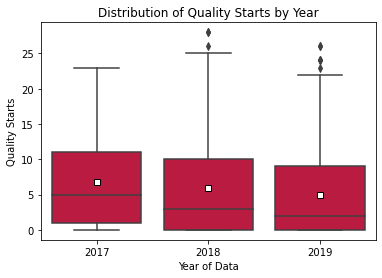

In [67]:
years = ['2017', '2018', '2019']
year_colors = ['#002D72','#D50032', '#AE8F6F' ]
color_dict = dict(zip(years, year_colors))
sns.boxplot(x = "variable", y = "value", data = allqs2, showmeans = True,
           meanprops={"marker":"s","markerfacecolor":'white', "markeredgecolor":"black"}, color = '#D50032')
plt.xlabel('Year of Data')
plt.xticks(range(0,3,1), ("2017", '2018', '2019'))
plt.ylabel('Quality Starts')
plt.title('Distribution of Quality Starts by Year');
#plt.savefig('images_for_proj2/qsdist_all_bx.pdf');

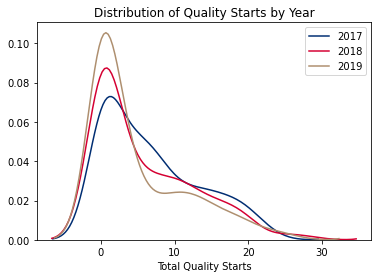

In [68]:
plt.title('Distribution of Quality Starts by Year')
sns.despine
sns.distplot(qs_17[['QS_2017']], hist = False, label = '2017', color = '#002D72')
sns.distplot(qs_18[['QS_2018']], hist = False, label = '2018', color = '#D50032')
sns.distplot(qs_19[['QS_2019']], hist = False, label = '2019', color = '#AE8F6F')
plt.xlabel('Total Quality Starts')
plt.legend();
#plt.savefig('images_for_proj2/qsdist_all.pdf');

In [69]:
HR_17 = df_proj_predict[['HR_proj_2017']]
HR_18 = val_proj_predict[['HR_2018']]
HR_19 = test_proj_predict[['HR_2019']]

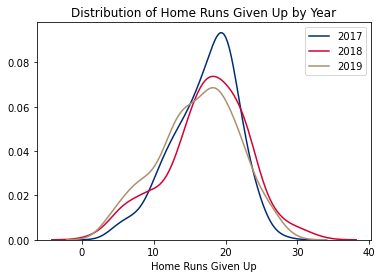

In [70]:
plt.title('Distribution of Home Runs Given Up by Year')
sns.distplot(HR_17[['HR_proj_2017']], hist = False, label = '2017', color = '#002D72')
sns.distplot(HR_18[['HR_2018']], hist = False, label = '2018', color = '#D50032')
sns.distplot(HR_19[['HR_2019']], hist = False, label = '2019', color = '#AE8F6F')
plt.xlabel('Home Runs Given Up');
#plt.savefig('images_for_proj2/HR.pdf');

In [71]:
HR_17 = df_proj_predict[['Age_proj_2017']]
age_18 = val_proj_predict[['Age_2018']]
age_19 = test_proj_predict[['Age_2019']]

### Visualize final model coefficients


In [72]:
coeffs = pd.DataFrame(list(zip(x_test.columns, m2.coef_)))

In [73]:
coeffs.columns = ['feature', 'coefficient']
coeffs = coeffs[coeffs.coefficient != 0]

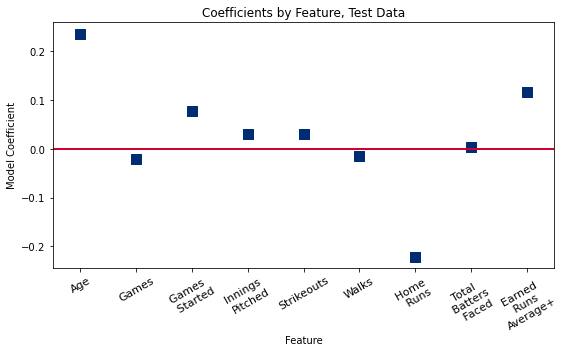

In [74]:
fig, ax = plt.subplots(figsize = (8, 5))
coeffs.plot(x = 'feature', y = 'coefficient', kind= 'bar', ax = ax, color = 'none', legend = False)
ax.scatter(x = np.arange(coeffs.shape[0]),
          marker = 's', s = 100,
          y=coeffs['coefficient'], color = '#002D72')
ax.axhline(y = 0, linestyle = '-', color = '#D50032', linewidth = 2)
_ = ax.set_xticklabels(['Age', 'Games', 'Games \n Started', 'Innings \nPitched', 'Strikeouts', 
                       'Walks', 'Home \n Runs', 'Total \n Batters \n Faced', 'Earned \n Runs \nAverage+'], 
                       rotation=30, fontsize=11)
plt.xlabel('Feature')
plt.ylabel('Model Coefficient')
plt.title('Coefficients by Feature, Test Data')
plt.tight_layout()
#plt.savefig('images_for_proj2/coeffs.pdf');

 ## Evaluate predictions, using first-degree model

I wanted to evaluate how good my predictions were, by looking at the residuals for each of the datasets.

### Training Data

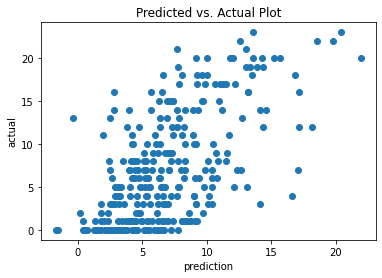

In [75]:
plt.scatter(df_proj_predict.m2_y, df_proj_predict.QS_2017)
plt.xlabel("prediction")
plt.ylabel("actual");
plt.title('Predicted vs. Actual Plot');

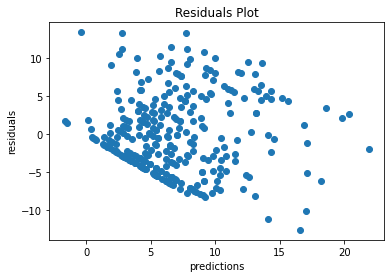

In [76]:
plt.scatter(df_proj_predict.m2_y, df_proj_predict.m2_res)
plt.xlabel("predictions")
plt.ylabel("residuals")
plt.title('Residuals Plot');

### Validation Data

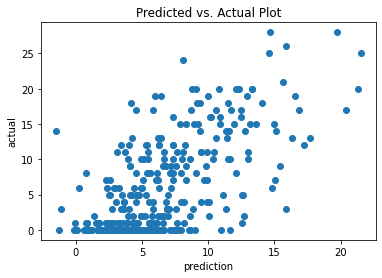

In [77]:
plt.scatter(val_proj_predict.m2_y, val_proj_predict.QS_2018)
plt.xlabel("prediction")
plt.ylabel("actual")
plt.title('Predicted vs. Actual Plot');

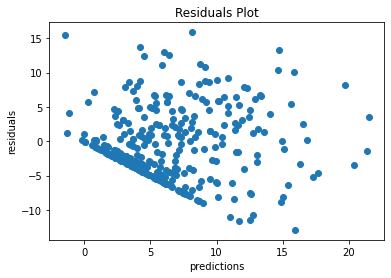

In [78]:
plt.scatter(val_proj_predict.m2_y, val_proj_predict.m2_res)
plt.xlabel("predictions")
plt.ylabel("residuals")
plt.title('Residuals Plot');

### Test Data


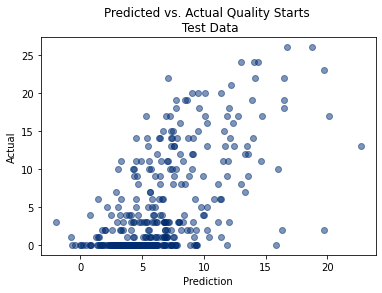

In [79]:
plt.scatter(test_proj_predict.m2_y, test_proj_predict.QS_2019, alpha = 0.5, color = "#002D72")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Predicted vs. Actual Quality Starts \n Test Data");
#plt.savefig('images_for_proj2/test_predact.pdf');

Text(0.5, 1.0, 'Residuals Plot for Test Data')

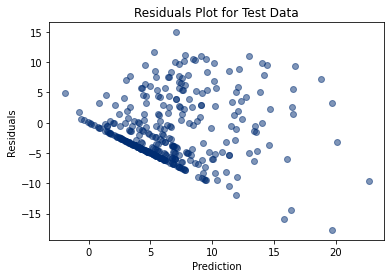

In [80]:
plt.scatter(test_proj_predict.m2_y, test_proj_predict.m2_res, alpha = 0.5, color = "#002D72")
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Test Data")
#plt.savefig('images_for_proj2/test_residuals.pdf');

To further evaluate my model, I wanted to calcualte mean absolute error and root mean squared error.

In [81]:
def MAE(actuals, preds): #root mean squared error
    return np.mean(np.abs(actuals-preds))

MAE(test_proj_predict.QS_2019,test_proj_predict.m2_y)

4.504216212558169

In [82]:
def RMSE(actuals, preds): #root mean squared error
    return np.sqrt(np.mean((actuals - preds)**2))

RMSE(test_proj_predict.QS_2019,test_proj_predict.m2_y)

5.328848113685321

### Player Exploration

Which players was I totally wrong on in 2019?

In [83]:
test_underpred = test_proj_predict[test_proj_predict.m2_res > 10]

In [84]:
test_proj_predict[test_proj_predict.m2_res > 10][['Full_Name', 'Age_2019', 'QS_2019', 'm2_y', 'm2_res', 'mp2_y', 'mp2_res']]

,Full_Name,Age_2019,QS_2019,m2_y,m2_res,mp2_y,mp2_res
12,Shane Bieber,24,24,13.013365,10.986635,13.015390,10.984610
20,Madison Bumgarner,29,20,9.060545,10.939455,8.829612,11.170388
53,Mike Fiers,34,19,8.467386,10.532614,8.116628,10.883372
68,Lucas Giolito,24,17,5.324824,11.675176,4.839450,12.160550
98,Mike Leake,31,19,8.628902,10.371098,7.951172,11.048828
108,Lance Lynn,32,20,9.540808,10.459192,9.339730,10.660270
156,Hyun-Jin Ryu,32,22,7.064266,14.935734,5.416808,16.583192
172,Mike Soroka,21,18,7.749696,10.250304,7.193734,10.806266
315,Brett Anderson,31,17,6.956005,10.043995,6.137589,10.862411
321,Marco Gonzales,27,19,7.769529,11.230471,7.347630,11.652370


In [85]:
test_underpred[['Full_Name', 'Age_2019', 'QS_2019', 'm2_y', 'm2_res', 'mp2_y', 'mp2_res']]

,Full_Name,Age_2019,QS_2019,m2_y,m2_res,mp2_y,mp2_res
12,Shane Bieber,24,24,13.013365,10.986635,13.015390,10.984610
20,Madison Bumgarner,29,20,9.060545,10.939455,8.829612,11.170388
53,Mike Fiers,34,19,8.467386,10.532614,8.116628,10.883372
68,Lucas Giolito,24,17,5.324824,11.675176,4.839450,12.160550
98,Mike Leake,31,19,8.628902,10.371098,7.951172,11.048828
108,Lance Lynn,32,20,9.540808,10.459192,9.339730,10.660270
156,Hyun-Jin Ryu,32,22,7.064266,14.935734,5.416808,16.583192
172,Mike Soroka,21,18,7.749696,10.250304,7.193734,10.806266
315,Brett Anderson,31,17,6.956005,10.043995,6.137589,10.862411
321,Marco Gonzales,27,19,7.769529,11.230471,7.347630,11.652370


In [86]:
test_underpred2 = test_underpred[['Full_Name', 'Age_2019', 'QS_2019', 'm2_y', 'm2_res']].sort_values('m2_res', ascending = False).set_index('Full_Name').head()

In [87]:
test_underpred2

,Age_2019,QS_2019,m2_y,m2_res
Full_Name,,,,
Hyun-Jin Ryu,32,22,7.064266,14.935734
Lucas Giolito,24,17,5.324824,11.675176
Marco Gonzales,27,19,7.769529,11.230471
Shane Bieber,24,24,13.013365,10.986635
Madison Bumgarner,29,20,9.060545,10.939455


In [88]:
test_underpred2.columns = ['Age', 'QS', 'Predicted QS', 'Residuals']

In [89]:
test_underpred2

,Age,QS,Predicted QS,Residuals
Full_Name,,,,
Hyun-Jin Ryu,32,22,7.064266,14.935734
Lucas Giolito,24,17,5.324824,11.675176
Marco Gonzales,27,19,7.769529,11.230471
Shane Bieber,24,24,13.013365,10.986635
Madison Bumgarner,29,20,9.060545,10.939455


In [90]:
test_overpred = test_proj_predict[test_proj_predict.m2_res < -10]

In [91]:
test_overpred2 = test_overpred[['Full_Name', 'Age_2019', 'QS_2019', 'm2_y', 'm2_res']].sort_values('m2_res', ascending = False).set_index('Full_Name').head()

In [92]:
test_overpred2.columns = ['Age', 'QS', 'Predicted QS', 'Residuals']

In [93]:
test_overpred2

,Age,QS,Predicted QS,Residuals
Full_Name,,,,
Zack Godley,29,1,11.371593,-10.371593
Chad Green,28,0,11.919603,-11.919603
Carlos Carrasco,32,2,16.352834,-14.352834
Luis Severino,25,0,15.821816,-15.821816
Corey Kluber,33,2,19.703679,-17.703679


In [94]:
test_perfpred = test_proj_predict[(test_proj_predict.m2_res < 1) &  (test_proj_predict.m2_res > -1)]

In [95]:
test_perfpred[['Full_Name', 'Age_2019', 'QS_2019', 'm2_y', 'm2_res', 'mp2_y', 'mp2_res']].head(10)

,Full_Name,Age_2019,QS_2019,m2_y,m2_res,mp2_y,mp2_res
5,Jake Arrieta,33,10,9.027290,0.972710,8.681508,1.318492
17,Steven Brault,27,5,4.509927,0.490073,5.423451,-0.423451
23,Ryan Carpenter,28,1,1.502477,-0.502477,2.293020,-1.293020
30,Mike Clevinger,28,13,12.410991,0.589009,12.403688,0.596312
38,Yu Darvish,32,11,11.539243,-0.539243,10.569491,0.430509
67,Kyle Gibson,31,9,9.927086,-0.927086,9.479050,-0.479050
82,David Hess,25,2,1.722632,0.277368,2.253638,-0.253638
129,Jake Odorizzi,29,9,8.794090,0.205910,8.474145,0.525855
130,Thomas Pannone,25,1,1.294308,-0.294308,2.451506,-1.451506
131,James Paxton,30,13,13.497784,-0.497784,12.907666,0.092334


In [96]:
val_underpred = val_proj_predict[val_proj_predict.m2_res > 10]

In [97]:
val_underpred[['Full_Name', 'Age_2018', 'QS_2018', 'm2_y', 'm2_res', 'mp2_y', 'mp2_res']]

,Full_Name,Age_2018,QS_2018,m2_y,m2_res,mp2_y,mp2_res
43,Jacob deGrom,30,28,14.680950,13.319050,14.607074,13.392926
58,Kyle Freeland,25,24,8.117507,15.882493,8.631422,15.368578
86,Andrew Heaney,27,17,4.549193,12.450807,4.122472,12.877528
106,Reynaldo Lopez,24,19,6.420134,12.579866,6.042178,12.957822
113,German Marquez,23,20,8.771501,11.228499,9.101615,10.898385
130,Aaron Nola,25,25,14.615892,10.384108,14.984082,10.015918
169,James Shields,36,19,6.018890,12.981110,5.774173,13.225827
198,Justin Verlander,35,26,15.844233,10.155767,15.954251,10.045749
204,Zack Wheeler,28,18,4.196189,13.803811,4.184789,13.815211
206,Trevor Williams,26,17,5.851129,11.148871,6.066641,10.933359


In [98]:
val_overpred = val_proj_predict[val_proj_predict.m2_res < - 10]

In [99]:
val_overpred[['Full_Name', 'Age_2018', 'QS_2018', 'm2_y', 'm2_res', 'mp2_y', 'mp2_res']]

,Full_Name,Age_2018,QS_2018,m2_y,m2_res,mp2_y,mp2_res
40,Yu Darvish,31,3,15.907847,-12.907847,15.902494,-12.902494
72,Luiz Gohara,21,0,10.998469,-10.998469,11.009741,-11.009741
140,Drew Pomeranz,29,2,12.744252,-10.744252,12.992758,-10.992758
160,Jeff Samardzija,33,1,12.523459,-11.523459,11.834445,-10.834445
163,Ervin Santana,35,0,11.660280,-11.660280,11.568771,-11.568771


In [100]:
val_overpred.describe().T

,count,mean,std,min,25%,50%,75%,max
QS_2018,5.0,1.200000,1.303840,0.000000,0.000000,1.000000,2.000000,3.000000
Age_2018,5.0,29.800000,5.403702,21.000000,29.000000,31.000000,33.000000,35.000000
G_2018,5.0,28.800000,1.303840,28.000000,28.000000,28.000000,29.000000,31.000000
GS_2018,5.0,28.600000,0.894427,28.000000,28.000000,28.000000,29.000000,30.000000
IP_2018,5.0,165.040000,12.113546,148.000000,157.300000,169.300000,173.300000,177.300000
K_2018,5.0,164.400000,25.696303,138.000000,154.000000,160.000000,163.000000,207.000000
BB_2018,5.0,51.600000,10.478550,35.000000,51.000000,51.000000,59.000000,62.000000
HR_2018,5.0,19.400000,3.911521,13.000000,19.000000,20.000000,22.000000,23.000000
H_2018,5.0,151.800000,17.282940,135.000000,141.000000,142.000000,170.000000,171.000000
ER_2018,5.0,68.000000,8.426150,61.000000,61.000000,64.000000,75.000000,79.000000
